In [53]:
!pip install mat73
import mat73
data_dict = mat73.loadmat('smtp.mat')
from sklearn.ensemble import IsolationForest
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve, auc

In [54]:
#here I should load the 'smtp.mat' file using mat73
data_dict = mat73.loadmat('smtp.mat')
X = data_dict['X']
y = data_dict['y'].ravel()

In [59]:
# unsupervised outlier detection using Local Outlier Factor (LOF)
start_time_lof = time.time()
lof = LocalOutlierFactor(n_neighbors=10, metric='euclidean')
y_score_lof = lof.fit(X)
end_time_lof = time.time()
processing_time_lof = end_time_lof- start_time_lof

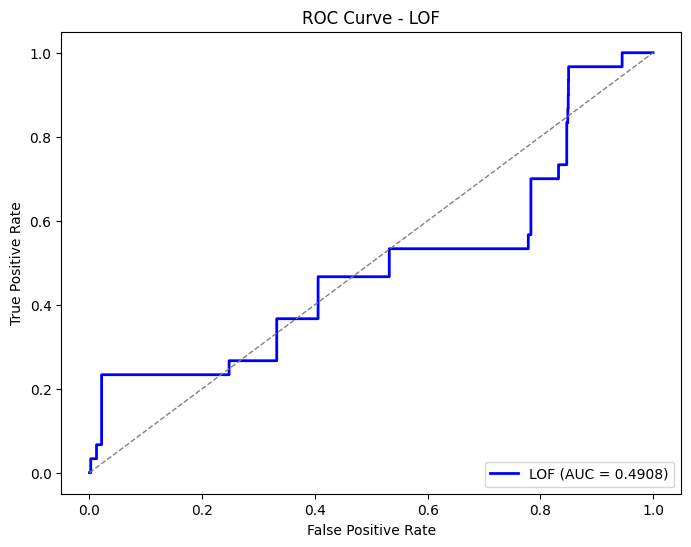

Processing time for LOF: 1.2689 seconds
AUC for LOF: 0.4908


In [61]:

outlier_scores = -lof.negative_outlier_factor_

# Calculate AUC for LOF
fpr_lof, tpr_lof, _ = roc_curve(y, outlier_scores)
auc_lof = auc(fpr_lof, tpr_lof)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lof, tpr_lof, color='blue', lw=2, label=f'LOF (AUC = {auc_lof:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LOF')
plt.legend(loc='lower right')
plt.show()

print(f"Processing time for LOF: {processing_time_lof:.4f} seconds")
print(f"AUC for LOF: {auc_lof:.4f}")


In [60]:
# unsupervised outlier detection using Isolation Forest
start_time = time.time()
isolation_forest = IsolationForest(n_estimators=100, max_samples=256, random_state=42)
y_scores = isolation_forest.fit(X)
end_time=time.time()
processing_time = end_time - start_time

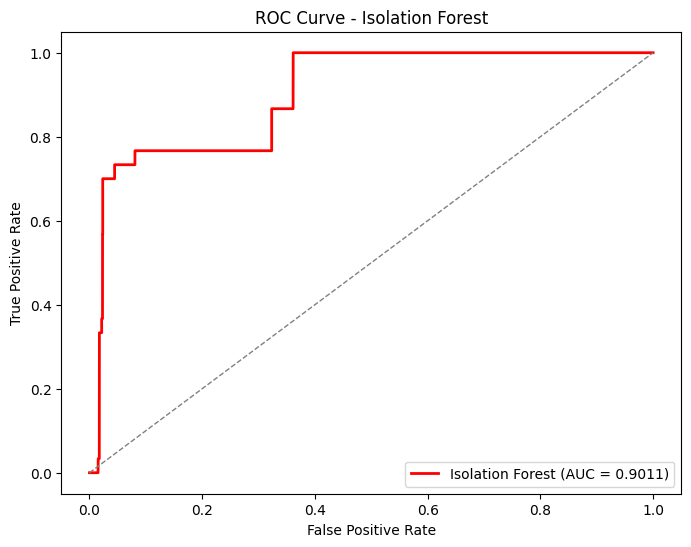

Processing time for Isolation Forest: 0.2822 seconds
AUC for Isolation Forest: 0.9011


In [58]:

outlier_scores = isolation_forest.decision_function(X)

# Calculate AUC for Isolation Forest
fpr, tpr, _ = roc_curve(y, -outlier_scores)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'Isolation Forest (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Isolation Forest')
plt.legend(loc='lower right')
plt.show()

print(f"Processing time for Isolation Forest: {processing_time:.4f} seconds")
print(f"AUC for Isolation Forest: {auc_score:.4f}")


**Comparision:**
Therefore, based on the provided results, Isolation Forest appears to be both more accurate and faster than LOF for this specific dataset ('smtp.mat'). It shows better accuracy in detecting anomalies (higher AUC) and achieves this with faster processing.

**So according to me Isolation Forest appear more accurate.**